In [ ]:
import pandas as pd


In [23]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd
import re 
import string 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))

def explore(df):
  # DATA
  st.write('Data:')
  st.write(df)
  # SUMMARY
  df_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
  numerical_cols = df_types[~df_types['Data Type'].isin(['object',
                   'bool'])].index.values
  df_types['Count'] = df.count()
  df_types['Unique Values'] = df.nunique()
  df_types['Min'] = df[numerical_cols].min()
  df_types['Max'] = df[numerical_cols].max()
  df_types['Average'] = df[numerical_cols].mean()
  df_types['Median'] = df[numerical_cols].median()
  df_types['St. Dev.'] = df[numerical_cols].std()
  st.write('Summary:')
  #st.write(df_types)

def get_df(file):
  # get extension and read file
  extension = file.name.split('.')[1]
  if extension.upper() == 'CSV':
    df = pd.read_csv(file)
  elif extension.upper() == 'XLSX':
    df = pd.read_excel(file, engine='openpyxl')
  elif extension.upper() == 'PICKLE':
    df = pd.read_pickle(file)
  return df


def download_file(df, types, new_types, extension):
  for i, col in enumerate(df.columns):
    new_type = types[new_types[i]]
    if new_type:
      try:
        df[col] = df[col].astype(new_type)
      except:
        st.write('Could not convert', col, 'to', new_types[i])
def load_model():
    with open('saved_steps1.pkl', 'rb') as file:
        data = pickle.load(file)
    return data

data = load_model()

regressor = data["model"]

vectorTF = data["tf_vector"]



def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
def get_feature_vector(train_fit):
            vector = TfidfVectorizer(sublinear_tf=True)
            vector.fit(train_fit)
            return vector

df = pd.read_csv('facebook_comments.csv')
df = df.rename(columns={'message_text':'text'})    
df = df[['id', 'text']]
#df = pd.DataFrame(data=pd.read_csv('result.csv').values,columns =["tweet_id", "created_at", "text"])   
df.text = df["text"].apply(preprocess_tweet_text)
test_feature = vectorTF.transform(np.array(df.iloc[:, 1]).ravel())
prediction = regressor.predict(test_feature)
prediction

c:\Users\M Ksar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9628\2023225803.py:54: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(file)
c:\Users\M Ksar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.0 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#

array([4, 4], dtype=int64)

In [8]:
import pandas as pd
df = pd.read_csv('./linkedin_company_pages/FOLLOWERS_BY_COUNTRY.csv')
df1 = pd.read_csv('countries.csv')
df['lat'] = 0
df['lon'] = 0
df = df.dropna(subset=['country_id']).reset_index(drop=True)

for j in range(len(df1)):
    
    df1['Alpha-2 code'][j]=df1['Alpha-2 code'][j].lower()
df1

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9628\3625236838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Alpha-2 code'][j]=df1['Alpha-2 code'][j].lower()


,Unnamed: 0,Country,Alpha-2 code,iso3,Numeric code,lat,lon
0,0,Afghanistan,af,AFG,"""4""",33.0000,65.0000
1,1,Albania,al,ALB,"""8""",41.0000,20.0000
2,2,Algeria,dz,DZA,"""12""",28.0000,3.0000
3,3,American Samoa,as,ASM,"""16""",-14.3333,-170.0000
4,4,Andorra,ad,AND,"""20""",42.5000,1.6000
...,...,...,...,...,...,...,...
249,250,"Virgin Islands, U.S.",vi,VIR,"""850""",18.3333,-64.8333
250,251,Wallis and Futuna,wf,WLF,"""876""",-13.3000,-176.2000
251,253,Yemen,ye,YEM,"""887""",15.0000,48.0000
252,254,Zambia,zm,ZMB,"""894""",-15.0000,30.0000


0      True
1      True
2      True
3      True
4      True
       ... 
104    True
105    True
106    True
107    True
108    True
Name: lon, Length: 109, dtype: bool

In [119]:


for j in range(len(df1)):
    for i in range(len(df)):
       if (df['country_id'][i] == df1['Alpha-2 code'][j] and df['lat'][i]==0 and df['lon'][i]==0 ):
            df['lat'][i] = df1['lat'][j]
            df['lon'][i] = df1['lon'][j]

df

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9760\320331269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][i] = df1['lat'][j]
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_9760\320331269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon'][i] = df1['lon'][j]


,Unnamed: 0,_fivetran_id,follower_counts_organic_follower_count,follower_counts_paid_follower_count,_organization_entity_urn,country_id,_fivetran_synced,lat,lon
0,0,Ww+m+xboc5GreZkzVp9xoqu6drU=,1,0,urn:li:organization:69569872,ne,2022-08-08 10:42:06.097000+00:00,16.0,8.0000
1,1,hrfDyLFvjuWdry5z2XJtxNsB3bE=,12,0,urn:li:organization:11841037,gb,2022-08-08 10:42:19.051000+00:00,54.0,-2.0000
2,2,gbjMf4pqZv1+7N76/P5I8+AcF0Q=,5,0,urn:li:organizationBrand:69569872,tn,2022-08-08 10:42:37.938000+00:00,34.0,9.0000
3,3,JYH/d5WD4OXKCdxRseuuveeA+wc=,1,0,urn:li:organization:69569872,se,2022-08-08 10:42:06.095000+00:00,62.0,15.0000
4,4,nkR4ZpfOvrmEygvFzTypj/uAr3M=,1,0,urn:li:organization:11841037,ht,2022-08-08 10:42:19.074000+00:00,19.0,-72.4167
...,...,...,...,...,...,...,...,...,...
104,105,5ez8WGzr+vt/gTJYTGkBSsm8to0=,5,0,urn:li:organization:11841037,de,2022-08-08 10:42:19.058000+00:00,51.0,9.0000
105,106,LX7bwBpRxtfuklVIGlM3l8coJwA=,4,0,urn:li:organization:11841037,fi,2022-08-08 10:42:19.061000+00:00,64.0,26.0000
106,107,gi+QZQ/rteB7RS8rV7x6LLqzLqc=,1,0,urn:li:organization:78306774,ua,2022-08-08 10:42:26.196000+00:00,49.0,32.0000
107,108,yVF/lyHWcg4Vaqkq0leqbxSwMHg=,3,0,urn:li:organization:11841037,in,2022-08-08 10:42:19.063000+00:00,20.0,77.0000


In [ ]:
import pandas as pd
df = pd.read_csv('KEYWORD_PAGE_REPORT.csv')
df = df.groupby(by='country', as_index=False).agg({'impressions': 'sum' , 'clicks':'sum' })
df = df.sort_values(by = 'clicks' , ascending=False  )
df = df.reset_index(drop=True)
df['lat'] = 0
df['lng'] = 0
df1 = pd.read_csv('countries.csv')

for j in range(len(df1)):
    for i in range(len(df)):
       if (df['country'][i].lower() == df1['iso3'][j].lower() and df['lat'][i]==0 and df['lng'][i]==0 ):
            df['lat'][i] = df1['lat'][j]
            df['lng'][i] = df1['lon'][j]
df

In [139]:
import pandas as pd
df = pd.read_csv('KEYWORD_PAGE_REPORT.csv')
df = df[['date','keyword' ,'page', 'clicks' , 'impressions','position']]
df = df.groupby(by='page', as_index=False).agg({'impressions': 'sum' , 'clicks':'sum' })
df = df.sort_values(by = 'impressions' , ascending=False  )
df = df.reset_index(drop=True)

categories = [
    {"name": df['page'][0], "value": df['impressions'][0] , "value1": df['clicks'][0]  }
    
]
for i in range(1, 100):
    categoties = categories.append({"name": df['page'][i], "value": df['impressions'][i] , "value1": df['clicks'][i]})
categories

[{'name': 'https://www.kertys.com/solutions/anaplan',
  'value': 56368.0,
  'value1': 85.0},
 {'name': 'https://www.kertys.com/clients/dematerialisation-des-processus-metiers-cmim',
  'value': 38840.0,
  'value1': 17.0},
 {'name': 'https://www.kertys.com/ressources/plateformes-lms-et-lcms-pouvez-vous-faire-la-difference',
  'value': 29745.0,
  'value1': 73.0},
 {'name': 'https://www.kertys.com/ressources/sirh-systeme-dinformation-des-ressources-humaines',
  'value': 25728.0,
  'value1': 206.0},
 {'name': 'https://www.kertys.com/ressources/dematerialisation-de-la-gestion-des-courriers-entrants-et-sortants-du-bureau-dordre-au-maroc',
  'value': 13812.0,
  'value1': 98.0},
 {'name': 'https://www.kertys.com/ressources/8-problemes-resolus-par-les-solutions-de-business-intelligence-bi',
  'value': 10606.0,
  'value1': 41.0},
 {'name': 'https://www.kertys.com/ressources/solutions-ged-au-maroc-dematerialisation-et-archivage-numerique',
  'value': 10450.0,
  'value1': 160.0},
 {'name': 'https:/

In [138]:
from plotly.subplots import make_subplots


subplots = make_subplots(
    rows=len(categories),
    cols=1,
    subplot_titles=[x["name"] for x in categories],
    shared_xaxes=True,
    print_grid=False,
    vertical_spacing=(0.45 / len(categories)),
)
_ = subplots['layout'].update(
    width=550,
    plot_bgcolor='#fff',
)
#2030a0
for k, x in enumerate(categories):
    subplots.add_trace(dict(
        type='bar',
        orientation='h',
        y=[x["name"]],
        x=[x["value1"]],
        text=["{:,.0f}".format(x["value1"])],
        hoverinfo='text',
        textposition='auto',
        marker=dict(
            color="#2030a0",
        ),
    ), k+1, 1)
    subplots.add_trace(dict(
        type='bar',
        orientation='h',
        y=[x["name"]],
        x=[x["value"]],
        text=["{:,.0f}".format(x["value"])],
        hoverinfo='text',
        textposition='auto',
        marker=dict(
            color="#7030a0",
        ),
    ), k+1, 1)
subplots['layout'].update(
    showlegend=False,
)
for x in subplots["layout"]['annotations']:
    x['x'] = 0
    x['xanchor'] = 'left'
    x['align'] = 'left'
    x['font'] = dict(
        size=12,
    )
for axis in subplots['layout']:
    if axis.startswith('yaxis') or axis.startswith('xaxis'):
        subplots['layout'][axis]['visible'] = False

subplots['layout']['margin'] = {
    'l': 0,
    'r': 20,
    't': 20,
    'b': 1,
}
height_calc = 45 * len(categories)
height_calc = max([height_calc, 350])
subplots['layout']['height'] = height_calc
subplots['layout']['width'] = height_calc
subplots

In [81]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

x = [ for i  in range(5)]

y = [4,3,3,3,2,3,3,3,3]

Disease = ['Acute Treatment of Migraine','Preventive Treatment of Migraine','Acute and Preventive Migraine','Lung Inflammation COVID-19',"Alzheimer's Disease", "OCD", "Spinocerebellar Ataxia", "Multiple System Atrophy", "Amyotrophic Lateral Sclerosis"]
Disease.reverse()
fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups
bar_plot = ax.barh(ind, y, width, color="green", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))

def autolabel(bar_plot):
    for idx,rect in enumerate(bar_plot):
        ax.text(0.25, idx+.25, Disease[idx], color = 'white')
autolabel(bar_plot)

plt.margins(0,0.05)
plt.title('BHVN')
plt.ylabel('Drug')

plt.show()

SyntaxError: invalid syntax (903144906.py, line 6)

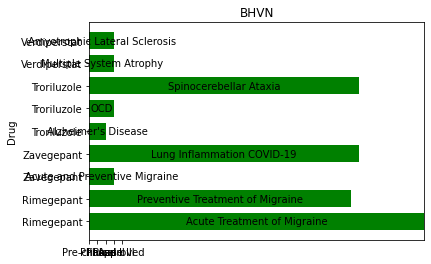

In [77]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

x =[u'Rimegepant',u'Rimegepant',u'Zavegepant',u'Zavegepant',u'Troriluzole',u'Troriluzole',u'Troriluzole',u'Verdiperstat',u'Verdiperstat']

y = [41,32,3,33,2,3,33,3,3]

Disease = ['Acute Treatment of Migraine','Preventive Treatment of Migraine','Acute and Preventive Migraine','Lung Inflammation COVID-19',"Alzheimer's Disease", "OCD", "Spinocerebellar Ataxia", "Multiple System Atrophy", "Amyotrophic Lateral Sclerosis"]

fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups

# I changed this line
p1 = ax.barh(ind,y, width, color="green", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)

# I added this line
ax.bar_label(p1, Disease, label_type='center')
plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))
plt.margins(0,0.05)
plt.title('BHVN')
plt.ylabel('Drug')

plt.show()

In [32]:
import pandas as pd
df = pd.read_csv('KEYWORD_PAGE_REPORT.csv')
df = df.groupby(by='country', as_index=False).agg({'impressions': 'sum' , 'clicks':'sum' })
df = df.sort_values(by = 'clicks' , ascending=False  )
df = df.reset_index(drop=True)
df['lat'] = 0
df['lng'] = 0
df1 = pd.read_csv('countries.csv')

for j in range(len(df1)):
    for i in range(len(df)):
       if (df['country'][i].lower() == df1['iso3'][j].lower() and df['lat'][i]==0 and df['lng'][i]==0 ):
            df['lat'][i] = df1['lat'][j]
            df['lng'][i] = df1['lon'][j]
df

C:\Users\M Ksar\AppData\Local\Temp\ipykernel_3196\3995411542.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][i] = df1['lat'][j]
C:\Users\M Ksar\AppData\Local\Temp\ipykernel_3196\3995411542.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lng'][i] = df1['lon'][j]


,country,impressions,clicks,lat,lng
0,mar,72545.0,1128.0,32.0000,-5.0000
1,fra,81153.0,327.0,46.0000,2.0000
2,tun,2718.0,35.0,34.0000,9.0000
3,dza,2313.0,22.0,28.0000,3.0000
4,sen,1029.0,20.0,14.0000,-14.0000
...,...,...,...,...,...
217,kgz,77.0,0.0,41.0000,75.0000
218,khm,442.0,0.0,13.0000,105.0000
219,kir,1.0,0.0,1.4167,173.0000
220,kna,11.0,0.0,17.3333,-62.7500


In [39]:
import pandas as pd
df = pd.read_csv('KEYWORD_PAGE_REPORT.csv')
df = df.groupby(by='country', as_index=False).agg({'impressions': 'sum' , 'clicks':'sum' })
df = df.sort_values(by = 'clicks' , ascending=False  )
df = df.reset_index(drop=True)
df['lat'] = 0
df['lng'] = 0
df1 = pd.read_csv('worldcountries.csv')
'''
for j in range(len(df1)):
    for i in range(len(df)):
       print('i : {0}  , j : {1}',i , j)

       if (df['country'][i] == df1['iso3'][j] and df['lat'][i]==0 and df['lng'][i]==0 ):
            df['lat'][i] = df1['lat'][j]
            df['lng'][i] = df1['lng'][j]
'''
def remove_quotes(string):
    return string.replace('"', "")
def remove_spaces(string): 
    return string.replace(' ', "")
def remove_(string): 
    string = string.replace('"', "")
    string = string.replace(' ', "")
    return string
def remove_1 (df):
    for i in range(len(df)):
        df['Longitude (average)'][i] = remove_(df['Longitude (average)'][i])
        df['Alpha-3 code'][i] = remove_(df['Alpha-3 code'][i])
        df['Alpha-2 code'][i] = remove_(df['Alpha-2 code'][i])
        df['Latitude (average)'][i] = remove_(df['Latitude (average)'][i])
    return df
        
df1 = remove_1(df1)
df1 = df1.rename(columns={"Alpha-3 code":"iso3","Latitude (average)":"lat","Longitude (average)":"lon"})
df1 = df1[df1.iso3 != 'ESH']
df1 = df1[df1.iso3 != 'ISR']
df1.to_csv('countries.csv')
df1

,Country,Alpha-2 code,iso3,Numeric code,lat,lon
0,Afghanistan,AF,AFG,"""4""",33,65
1,Albania,AL,ALB,"""8""",41,20
2,Algeria,DZ,DZA,"""12""",28,3
3,American Samoa,AS,ASM,"""16""",-14.3333,-170
4,Andorra,AD,AND,"""20""",42.5,1.6
...,...,...,...,...,...,...
250,"Virgin Islands, U.S.",VI,VIR,"""850""",18.3333,-64.8333
251,Wallis and Futuna,WF,WLF,"""876""",-13.3,-176.2
253,Yemen,YE,YEM,"""887""",15,48
254,Zambia,ZM,ZMB,"""894""",-15,30


In [66]:
import pandas as pd
df = pd.read_csv('KEYWORD_PAGE_REPORT.csv')
df = df[['date','keyword' ,'page', 'clicks' , 'impressions','position']]

resultat = df.groupby(by='keyword', as_index=False).agg({'page': pd.Series.nunique})
resultat = resultat.sort_values(by = 'page' , ascending=False , )
#resultat.to_csv('resultat.csv')
words = ""
resultat = resultat.reset_index(drop=True)
for i in range (1,100-1):
    words = words +','+ resultat['keyword'][i]

words = resultat['keyword'][0]  + words
words

'kertys,kertys maroc,ignimission,m-files,"m-files",rpa maroc,piql,ali lahrichi,talentsoft,m files,ged maroc,hubshare m-files,plateforme dataops,mfiles,maroc document,ged,dataops streamsets,sirh maroc,automation anywhere,ged image,automation anywhere rpa,pipelines de données,talentsoft logo png,cegid maroc,transformation digitale maroc,avantages de la rpa,automation maroc,rpa assurance,bureau d\'ordre,gestion de documents,streamsets,rpa automation anywhere,matu assurance,streamset,kerty,rpa finance,edm maroc,des courriers,gestion courriers,dematerialisation document,ged maroz,bpm maroc,rh maroc,archivage maroc,gestion du courrier entrant et sortant,société d\'archivage au maroc,ressources humaines maroc,bpm informatique,ged fournisseurs maroc,rpa webinar,gestion courrier entrant,bpm no code,bpm solution,rpa anywhere automation,gestion des processus,intégration de données,gestion du courrier entrant,workflow collecte données excel,intégration des données,rpa automation,gartner ged,logo a

In [ ]:

import streamlit as st
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
def create_wordcloud(topic):

    # Create text
    topic1 = 'law,contract,fees'
    topic2 = 'students,school,exams'
    topic3 = 'pastor,church,money,money1,money2,money3,money4,money5,money6,money7,money8,money9,money10,money11,money12,money13,money14,money15,money16,money17,money18,money19,money20'

    if topic == 'topic1':
        topic = topic1
    elif topic == 'topic2':
        topic = topic2
    else:
        topic = topic3

    wordcloud = WordCloud().generate(topic)
    return wordcloud

st.write("###WORLD CLOUD ")

            
topic = st.selectbox('select topic',['topic1','topic2','topic3'])
wordcloud = create_wordcloud(topic)
# Display the generated image:
fig, ax = plt.subplots(figsize = (12, 8))
ax.imshow(wordcloud)
plt.axis("off")
st.pyplot(fig)
st.write("###END WORLD CLOUD ")
           
st.write("###choose features per table")


In [ ]:
#########################################################################################
            # Load data
            st.title('covid_19_clean_complete')


            DATA_URL = ('covid.csv')
            @st.cache(allow_output_mutation=True)

            def load_data():
                data = pd.read_csv(DATA_URL)
                data['date'] = pd.to_datetime(data['date'],format='%d/%m/%Y' ).dt.strftime('%Y-%m-%d')
                return data

            # Load rows of data into the dataframe.
            df = load_data()
            st.write(df)
            ############################################################################################

           
            
            ########################################################################################

            

            ########################################################################################
            ### SELECTBOX widgets
            metrics =['total_cases','new_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand']

            cols = st.selectbox('Covid metric to view', metrics)

            # let's ask the user which column should be used as Index
            if cols in metrics:   
                metric_to_show_in_covid_Layer = cols  

            ########################################################################################
            ## MAP

            # Variable for date picker, default to Jan 1st 2020
            date = datetime.date(2020,1,1)

            # Set viewport for the deckgl map
            view = pdk.ViewState(latitude=0, longitude=0, zoom=0.2,)

            # Create the scatter plot layer
            covidLayer = pdk.Layer(
                    "ScatterplotLayer",
                    data=df,
                    pickable=False,
                    opacity=0.3,
                    stroked=True,
                    filled=True,
                    radius_scale=10,
                    radius_min_pixels=5,
                    radius_max_pixels=60,
                    line_width_min_pixels=1,
                    get_position=["Longitude", "Latitude"],
                    get_radius=metric_to_show_in_covid_Layer,
                    get_fill_color=[252, 136, 3],
                    get_line_color=[255,0,0],
                    tooltip="test test",
                )



            # Create the deck.gl map
            r = pdk.Deck(
                layers=[covidLayer],
                initial_view_state=view,
                map_style="mapbox://styles/mapbox/light-v10",
            )


            # Create a subheading to display current date
            subheading = st.subheader("")

            # Render the deck.gl map in the Streamlit app as a Pydeck chart 
            map = st.pydeck_chart(r)

            # Update the maps and the subheading each day for 90 days
            for i in range(0, 120, 1):
                # Increment day by 1
                date += datetime.timedelta(days=1)

                # Update data in map layers
                covidLayer.data = df[df['date'] == date.isoformat()]

                # Update the deck.gl map
                r.update()

                # Render the map
                map.pydeck_chart(r)

                # Update the heading with current date
                subheading.subheader("%s on : %s" % (metric_to_show_in_covid_Layer, date.strftime("%B %d, %Y")))
                
                # wait 0.1 second before go onto next day
                time.sleep(0.05)
